#Preparation stuff

First of all you need to get you HF token and put the value in the variable below (go to your profile and use or create a token accordingly / see the screenshot):

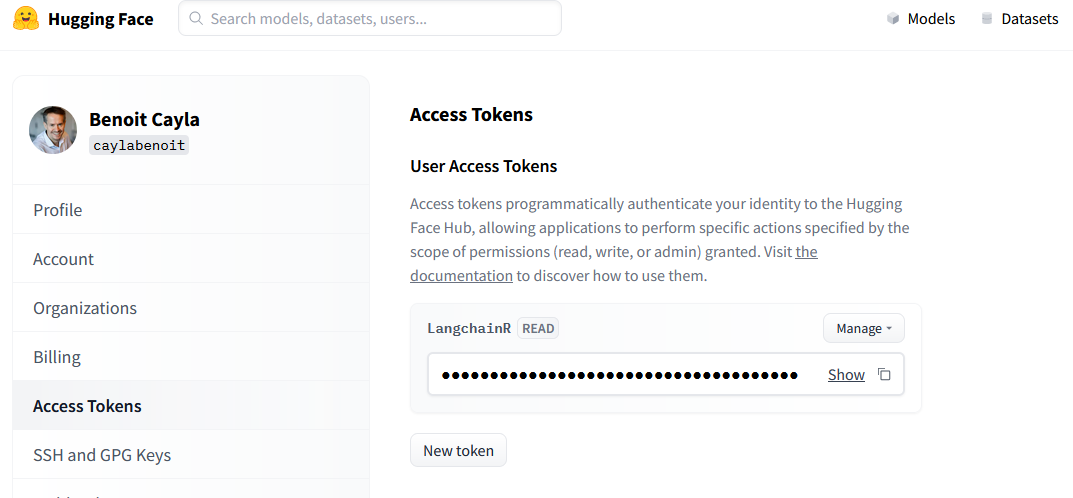

In [13]:
MYHFKEY = "[PASTE YOUR TOKEN HERE]"

# Initialize the notebook

In [14]:
!pip install langchain
!pip install huggingface_hub

In [15]:
import os
from langchain import PromptTemplate, HuggingFaceHub, LLMChain
import warnings
import requests

warnings.filterwarnings('ignore')

In [16]:
os.environ["HUGGINGFACEHUB_API_TOKEN"] = MYHFKEY
headers = {"Authorization": "Bearer " + MYHFKEY}

# Test with bigscience/bloom

## Direct via Python

Let's make some test by using the bigscience/bloom LLM ...  
The model description can be found here : https://huggingface.co/bigscience/bloom

In [17]:
template = """ {question}"""

prompt_template = PromptTemplate(input_variables=["question"], template=template)

prompt_template.format(question = "Comment allez-vous ?")

' Comment allez-vous ?'

In [18]:
llm=HuggingFaceHub(repo_id="bigscience/bloom",
                   model_kwargs={"temperature":1e-10})

chain = LLMChain(llm=llm,
                 prompt=prompt_template)

chain.run("Quel est le plus gros animal terrestre ?")

" Le plus gros animal terrestre est la baleine bleue. Elle peut mesurer jusqu'à 33 mètres de long et"

## via API call

It's possible to get the API call code directly through the huggingface UI (button deploy)

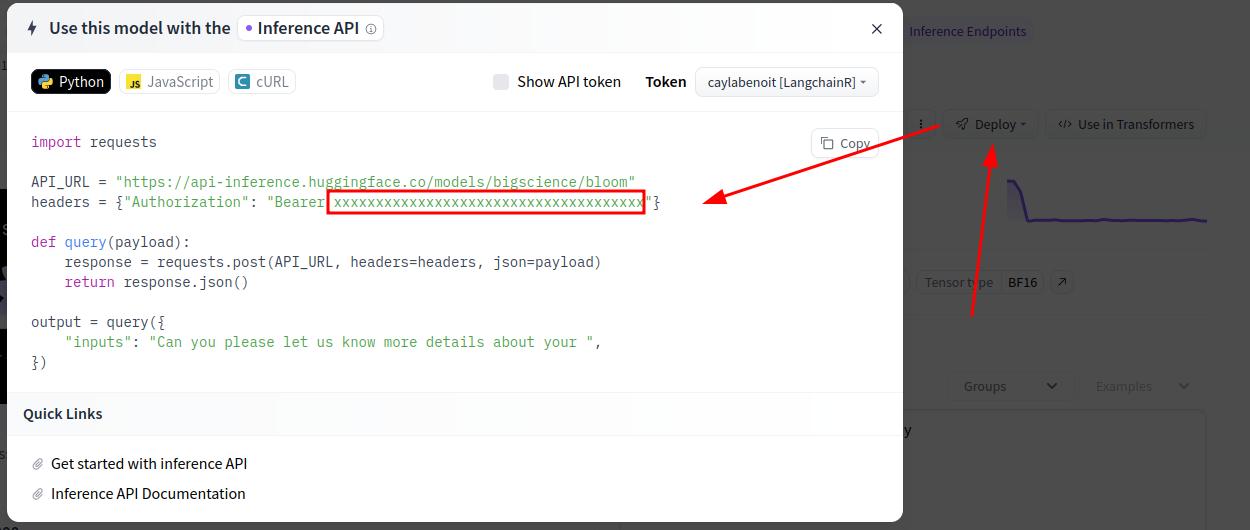

In [19]:
API_URL = "https://api-inference.huggingface.co/models/bigscience/bloom"

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()

output = query({
	"inputs": "Le plus grand pays au monde est ",
})

In [20]:
output

[{'generated_text': 'Le plus grand pays au monde est  la Russie.\nLa Russie est un pays immense.\nLa Russie est un pays immense.\nLa Russie est'}]

# Test with google/flan-t5-base Model

In [21]:
llm=HuggingFaceHub(repo_id="google/flan-t5-large",
                   model_kwargs={"temperature":1e-10})

chain = LLMChain(llm=llm,
                 prompt=prompt_template)

chain.run("quelle est la capitale de la France ?")

'paris'

In [22]:
API_URL = "https://api-inference.huggingface.co/models/google/flan-t5-large"

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()

output = query({
	"inputs": "quelle est la capitale de la France ?",
})
output

[{'generated_text': 'paris'}]

# Conversation

In [23]:
from langchain.chains import ConversationChain
from langchain.chains.conversation.memory import ConversationBufferMemory

conversation = ConversationChain(
    llm=llm,
    verbose=True,
    memory=ConversationBufferMemory()
)

conversation.predict(input="Bonjour !")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Bonjour !
AI:

> Finished chain.


'Bonjour !'

In [24]:
conversation.predict(input="Peux-tu m'en dire plus sur toi ?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Bonjour !
AI: Bonjour !
Human: Peux-tu m'en dire plus sur toi ?
AI:

> Finished chain.


'I am a French speaker.'